In [1]:
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

In [60]:
def defect4(image):
    img = image.copy()
        
    cv2.circle(img, center = (155, 156), radius = 152, color= (255, 255, 255), thickness = 2)
    #plt.imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img, 70, 255, cv2.THRESH_BINARY)
    contour, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
    cv2.drawContours(img,contour, -1, (0,255, 0), 5)
    #plt.imshow(img, cmap='gray') 
    
    cnt_copy = []
    for i in range(len(contour[0])):
        cnt_copy.append(contour[0][i])
    
    try:
        a = random.randint(0,len(cnt_copy))
        x1,y1 = cnt_copy[a][0]
        x2,y2 = cnt_copy[a+int(len(contour[0])/2)][0]
        print("x1,y1:", x1, y1)
        print("x2,y2:", x2, y2)
        m = (y2-y1)/(x2-x1)
        alpha = math.atan(m)*180/3.14
        print(alpha)
        total_length = 1.2* ((y2-y1)**2+(x2-x1)**2)**0.5
        length = 0
        flag = True


        while flag == True:
            x2,y2 = 0,0
            d = 0
            c = 0
            while cv2.pointPolygonTest(contour[0],(x2,y2),False) == -1:
                print("here2")
                d = total_length/random.randint(4,16)
                theta = alpha + random.randint(-20,20)
                print(theta)
                x2 = int(round(x1 + d * math.cos(theta*3.14/180)))
                y2 = int(round(y1 + d * math.sin(theta*3.14/180)))
                c += 1

                if c == 3:
                    flag = False
                    break
            image = cv2.line(img, (x1,y1), (x2,y2), (0,0,0), 2)
            x1,y1 = x2,y2
            print(x2,y2)
    except:
        image = r'E:\JustFocus INTERNSHIP/JustFocus INTERN Dropbox/Aravind Krishnan/Internship/Problems/Problem-3/data/green_chip0001.png'
        img = cv2.imread(image,  cv2.IMREAD_UNCHANGED)
        defect4(img)
    plt.imshow(image, cmap = 'gray')

x1,y1: 17 223
x2,y2: 294 92
-25.32343745797611
here2
-13.323437457976109
77 209
here2
-13.323437457976109
122 198
here2
-9.323437457976109
174 189
here2
-44.32343745797611
212 152
here2
-41.32343745797611
240 128
here2
-37.32343745797611
267 108
here2
-6.323437457976109
here2
-43.32343745797611
here2
-15.323437457976109
289 102


TypeError: Image data of dtype <U119 cannot be converted to float

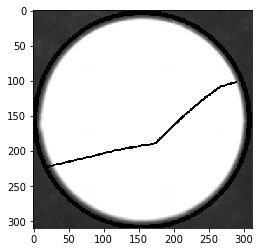

In [61]:
image = r'E:\JustFocus INTERNSHIP/JustFocus INTERN Dropbox/Aravind Krishnan/Internship/Problems/Problem-3/data/green_chip0001.png'
img = cv2.imread(image,  cv2.IMREAD_UNCHANGED)
defect4(img)